**UNIVERSIDADE DO ESTADO DO RIO DE JANEIRO**

**INSTITUTO DE MATEMÁTICA E ESTATÍSTICA - IME**

**DESCRIÇÃO:** Trabalho #1 de Computação Gráfica (IME/UERJ) 

---

#**0 - Instruções**

Neste trabalho só podem ser usadas as seguintes bibliotecas:

*   **Scikit-Image** ([`https://scikit-image.org/`](https://scikit-image.org/)): Processamento de imagens

*   **Scikit-Learn** ([`https://scikit-learn.org/`](https://scikit-learn.org/)): Machine Learning (possui algumas funções úteis para processamento de imagens)

*   **Matplotlib** ([`https://matplotlib.org/`](https://matplotlib.org/)): Gráficos

*   **Scipy** ([`https://www.scipy.org/`](https://www.scipy.org/)): É o pacote principal de rotinas científicas em Python

*   **Numpy** [`https://numpy.org/`](https://numpy.org/)): Análise numérica. É a principal biblioteca do Scipy


In [ ]:
from skimage import io # leitura e escrita de imagens
from skimage import data # banco de imagens
from skimage import exposure # manipulação de contraste
from skimage import util # utilidades 
from skimage import filters # filtros
from skimage import color # conversão de cores
from scipy import ndimage # contém a operação de convolução (convolve) para a aplicação de filtros digitais
import matplotlib.pyplot as plt # visualização das imagens e histogramas
import numpy as np # operações matemáticas e matriciais

Além disso, você pode usar as imagens presentes no repositório (GitHub) indicado abaixo para os exercícios ou, se quiser, pode usar outras imagens que tenha carregado para o seu Google Drive.

In [ ]:
# Copiando as imagens do GitHub e salvando na pasta imagens_CG_UERJ, que será criada da raíz do disco virtual do Colab.
!git clone https://github.com/gilson-costa/imagens_CG_UERJ imagens_CG_UERJ

# Exibindo a lista de arquivos e imagens no disco virtual
!ls -R

Cloning into 'imagens_CG_UERJ'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 52 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (52/52), done.
.:
imagens_CG_UERJ  sample_data

./imagens_CG_UERJ:
arara_full.png		      escorpião.jpg
brawn.bmp		      Ferrari.jpg
cobra.bmp		      grains.png
Coins.png		      leme.bmp
digital.png		      Placa_de_Trânsito_PARE.jpg
Einstein_alto_contraste.png   rosa_azul.jpg
Einstein_baixo_contraste.png  tulipas.jpg
Einstein_medio_contraste.png  woman.png

./sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


#**Exercício 1**
1 - Leia uma imagem colorida (de 3 canais) e a apresente numa figura.

2 - Separe os canais da imagem colorida e apresente numa mesma figura as imagens monocromáticas correspondentes (primeira linha) e os respectivos histogramas com bins de 0 a 255 (segunda linha).


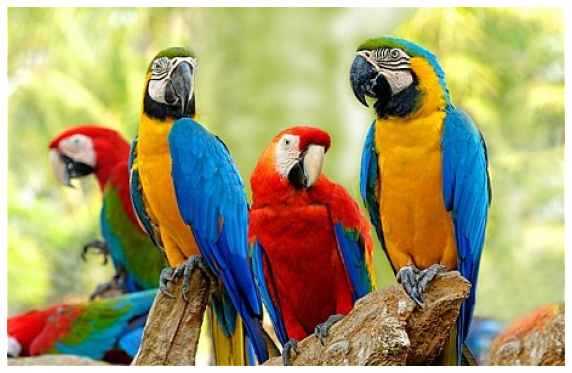

In [ ]:
# Lendo e apresentando a imagem colorida
img = io.imread("/content/imagens_CG_UERJ/arara_full.png")
plt.figure(figsize=(10,20))
plt.imshow(img)
plt.axis('off')
plt.show()

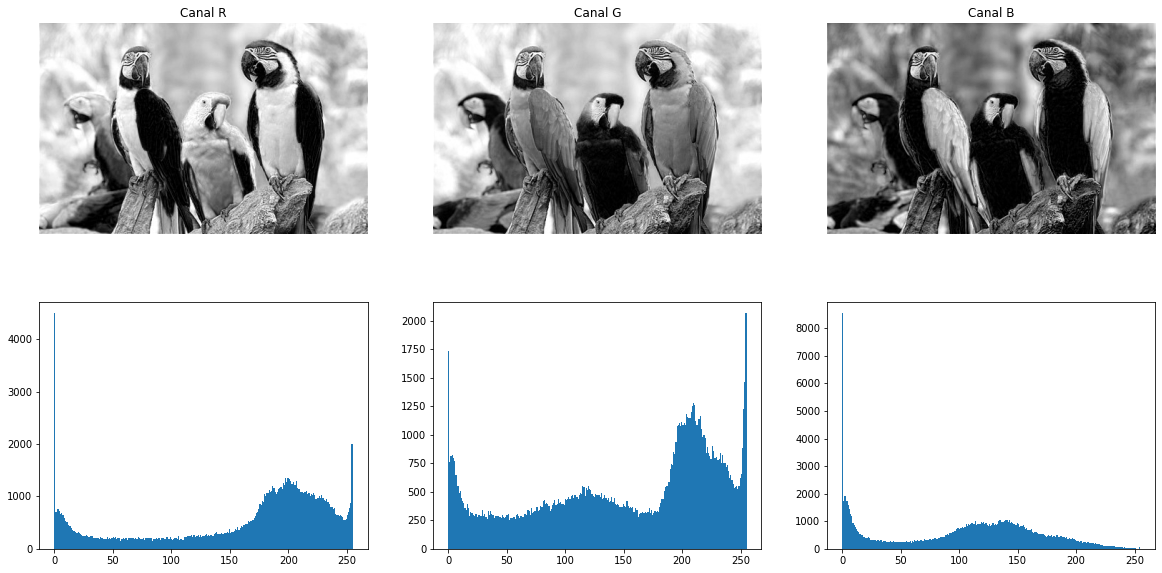

In [ ]:
# Separando os canais e apresentando as imagens monocromáticas (de cada canal) e histogramas correspondentes
img_R = img[:,:,0]
img_G = img[:,:,1]
img_B = img[:,:,2]

plt.figure(figsize=(20,10))
plt.subplot(2,3,1), plt.imshow(img_R, cmap='gray'), plt.axis('off'), plt.title('Canal R')
plt.subplot(2,3,2), plt.imshow(img_G, cmap='gray'), plt.axis('off'), plt.title('Canal G')
plt.subplot(2,3,3), plt.imshow(img_B, cmap='gray'), plt.axis('off'), plt.title('Canal B')
plt.subplot(2,3,4), plt.hist(img_R.flatten(), bins=256)
plt.subplot(2,3,5), plt.hist(img_G.flatten(), bins=256)
plt.subplot(2,3,6), plt.hist(img_B.flatten(), bins=256)
plt.show()

#**Exercício 2**
1 - Para a imagem usada no exercício anterior, calcule o negativo de cada canal individualmente e apresente numa mesma figura as imagens monocromáticas correspondentes (primeira linha) e os respectivos histogramas com bins de 0 a 255 (segunda linha).

2 - Combine (concatene) as os negativos dos canais da imagem original numa imagem tricromática e apresente a imagem colorida original e a negativa em uma única figura.

*Dica: para concatenar imagens monocromáticas use a função "np.stack".*

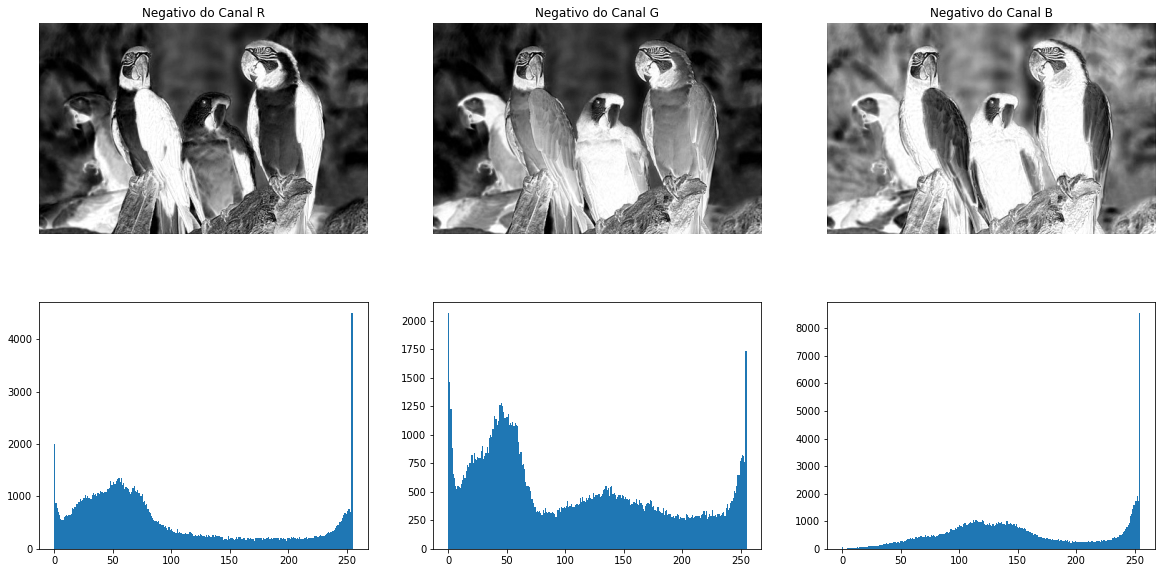

In [ ]:
# Calculando os negativos dos canais e apresentando as imagens monocromáticas (de cada canal) e histogramas correspondentes
img_R_neg = 255 - img_R
img_G_neg = 255 - img_G
img_B_neg = 255 - img_B

plt.figure(figsize=(20,10))
plt.subplot(2,3,1), plt.imshow(img_R_neg, cmap='gray'), plt.axis('off'), plt.title('Negativo do Canal R')
plt.subplot(2,3,2), plt.imshow(img_G_neg, cmap='gray'), plt.axis('off'), plt.title('Negativo do Canal G')
plt.subplot(2,3,3), plt.imshow(img_B_neg, cmap='gray'), plt.axis('off'), plt.title('Negativo do Canal B')
plt.subplot(2,3,4), plt.hist(img_R_neg.flatten(), bins=256)
plt.subplot(2,3,5), plt.hist(img_G_neg.flatten(), bins=256)
plt.subplot(2,3,6), plt.hist(img_B_neg.flatten(), bins=256)
plt.show()

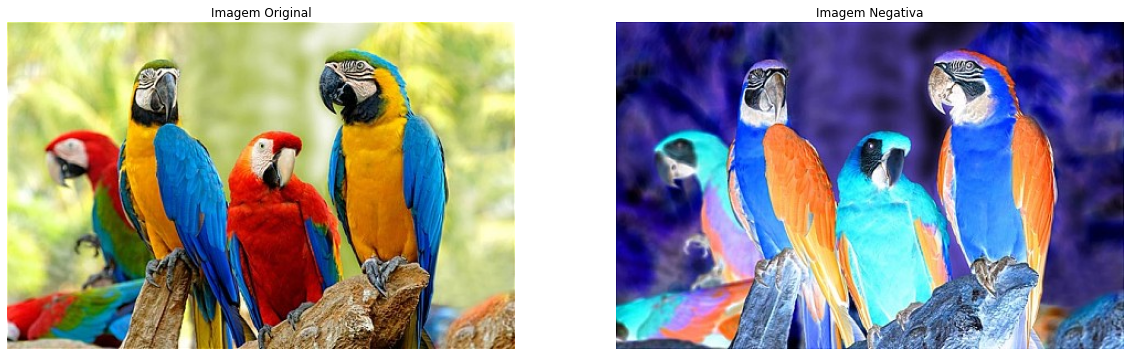

In [ ]:
# Concatenando os negativos dos canais e apresentando a imagem colorida original e a negativa

img_col = np.stack((img_R, img_G, img_B), axis=2)
img_neg = np.stack((img_R_neg, img_G_neg, img_B_neg), axis=2)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1), plt.imshow(img_col), plt.axis('off'), plt.title('Imagem Original')
plt.subplot(1,2,2), plt.imshow(img_neg), plt.axis('off'), plt.title('Imagem Negativa')
plt.show()

#**Exercício 3**
0 - Utilize a imagem colorida leme.bmp, presente no repositório GitHub indicado na Introdução.

1 - Separe os canais da imagem e realize uma cooreção Gama, de forma a clarear as áreas escuras, sem saturar muito as intensidades dos pixels da áreas claras da imagem.

2 - Apresente em uma mesma figura os canais da imagem original (primeira linha) e os respectivos histogramas (segunda linha).

3 - Apresente em uma mesma figura os canais corrigidos (primeira linha) e os respectivos histogramas (segunda linha).

4 - Apresente em uma mesma figura a imagem colorida original e a imagem colorida produzida através da concatenação dos canais corrigidos.

*Dicas: para fazer a correção Gama, use a função "exposure.adjust_gamma"; para concatenar imagens monocromáticas use a função "np.stack".*

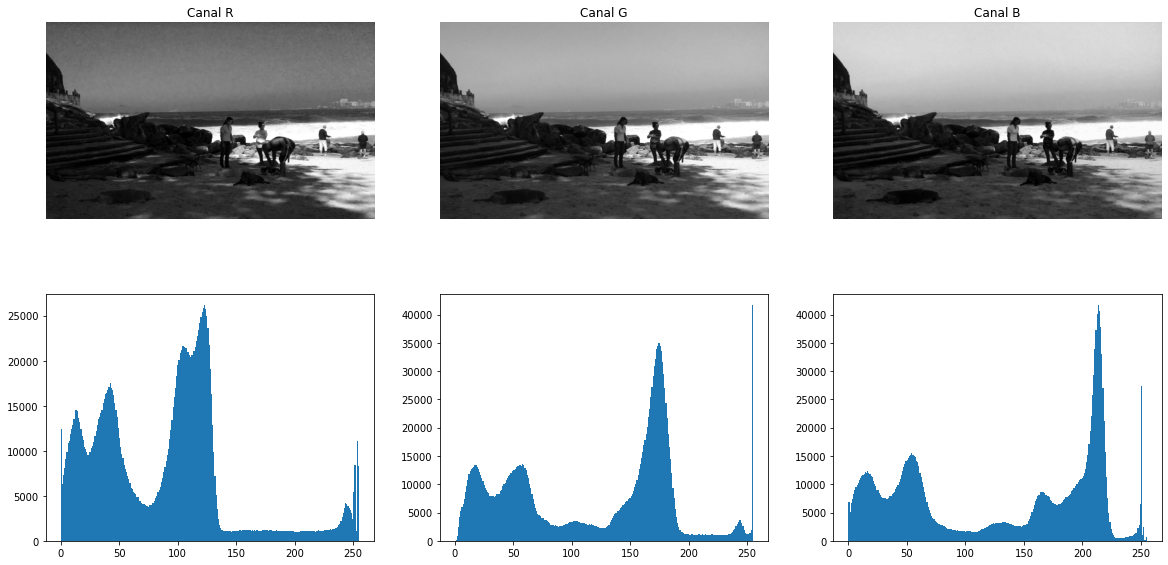

In [ ]:
# Lendo a imagem e apresentando as imagens dos canais e respectivos histogramas
leme = io.imread('/content/imagens_CG_UERJ/leme.bmp')

leme_R = leme[:,:,0]
leme_G = leme[:,:,1]
leme_B = leme[:,:,2]

plt.figure(figsize=(20,10))
plt.subplot(2,3,1), plt.imshow(leme_R, cmap='gray'), plt.axis('off'), plt.title('Canal R')
plt.subplot(2,3,2), plt.imshow(leme_G, cmap='gray'), plt.axis('off'), plt.title('Canal G')
plt.subplot(2,3,3), plt.imshow(leme_B, cmap='gray'), plt.axis('off'), plt.title('Canal B')
plt.subplot(2,3,4), plt.hist(leme_R.flatten(), bins=256)
plt.subplot(2,3,5), plt.hist(leme_G.flatten(), bins=256)
plt.subplot(2,3,6), plt.hist(leme_B.flatten(), bins=256)
plt.show()

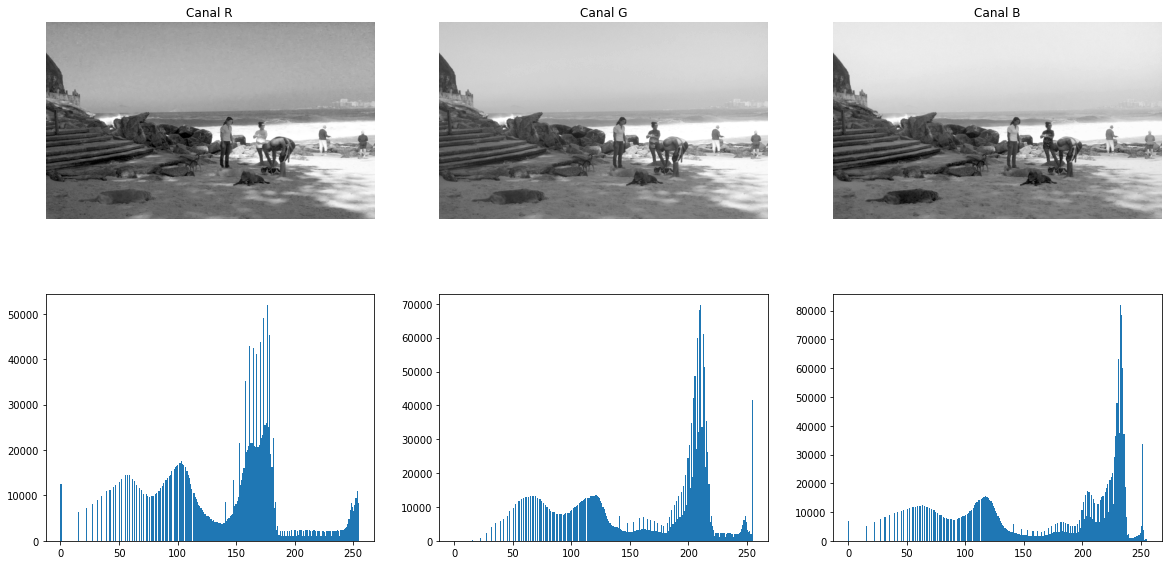

In [ ]:
# Aplicando a correção Gama sobre os canais e apresentando as imagens dos canais corrigidos e respectivos histogramas
leme_R_gamma = exposure.adjust_gamma(leme_R, gamma=0.5)
leme_G_gamma = exposure.adjust_gamma(leme_G, gamma=0.5)
leme_B_gamma = exposure.adjust_gamma(leme_B, gamma=0.5)

plt.figure(figsize=(20,10))
plt.subplot(2,3,1), plt.imshow(leme_R_gamma, cmap='gray'), plt.axis('off'), plt.title('Canal R')
plt.subplot(2,3,2), plt.imshow(leme_G_gamma, cmap='gray'), plt.axis('off'), plt.title('Canal G')
plt.subplot(2,3,3), plt.imshow(leme_B_gamma, cmap='gray'), plt.axis('off'), plt.title('Canal B')
plt.subplot(2,3,4), plt.hist(leme_R_gamma.flatten(), bins=256)
plt.subplot(2,3,5), plt.hist(leme_G_gamma.flatten(), bins=256)
plt.subplot(2,3,6), plt.hist(leme_B_gamma.flatten(), bins=256)
plt.show()

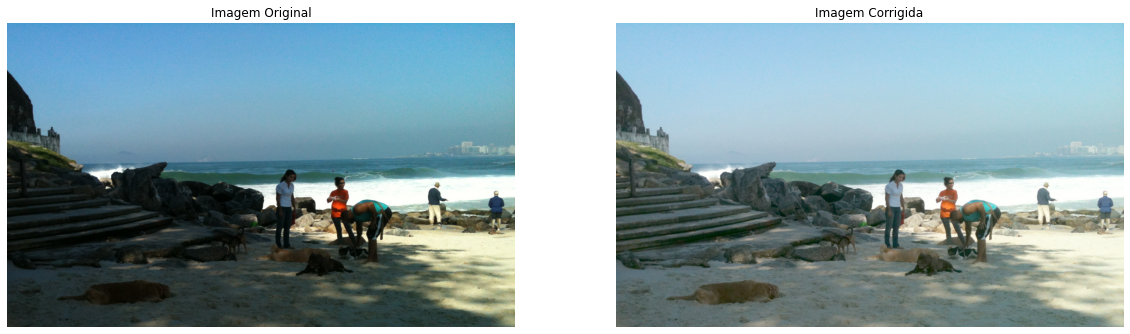

In [ ]:
# Concatenando os negativos dos canais e apresentando a imagem colorida original e a negativa
leme_col = np.stack((leme_R, leme_G, leme_B), axis=2)
leme_neg = np.stack((leme_R_gamma, leme_G_gamma, leme_B_gamma), axis=2)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1), plt.imshow(leme_col), plt.axis('off'), plt.title('Imagem Original')
plt.subplot(1,2,2), plt.imshow(leme_neg), plt.axis('off'), plt.title('Imagem Corrigida')
plt.show()

#**Exercício 4**
0 - Utilize as imagens "moon" e "camera" do módulo "data" do Skimage e realize os procedimentos listados abaixo para rada uma delas.

1 - Realize o alargamento de contraste das imagens: saturando os pixels com
intensidades inferiores àquela que corresponde ao limite (percentil) de 2% (dos
pixels com intensidade mais baixa); e saturando os pixels com intensidades
superiores àquela que corresponde ao limite (percentil) de 98% (dos pixels com
intensidade mais alta).

2 - Realize a equalização de histograma das imagens.

3 - Apresente numa única figura para cada imagem: a imagem original e as imagens transformadas nos itens 1 e 2 (primeira linha); e os respectivos histogramas (segunda linha). 

*Dicas: para calcular os percentis, use a função "np.percentile"; para fazer o alargamento de contraste, use a função "exposure.rescale_intensity"; para fazer a equalização de histogramas, use a função "exposure.equalize_hist".*

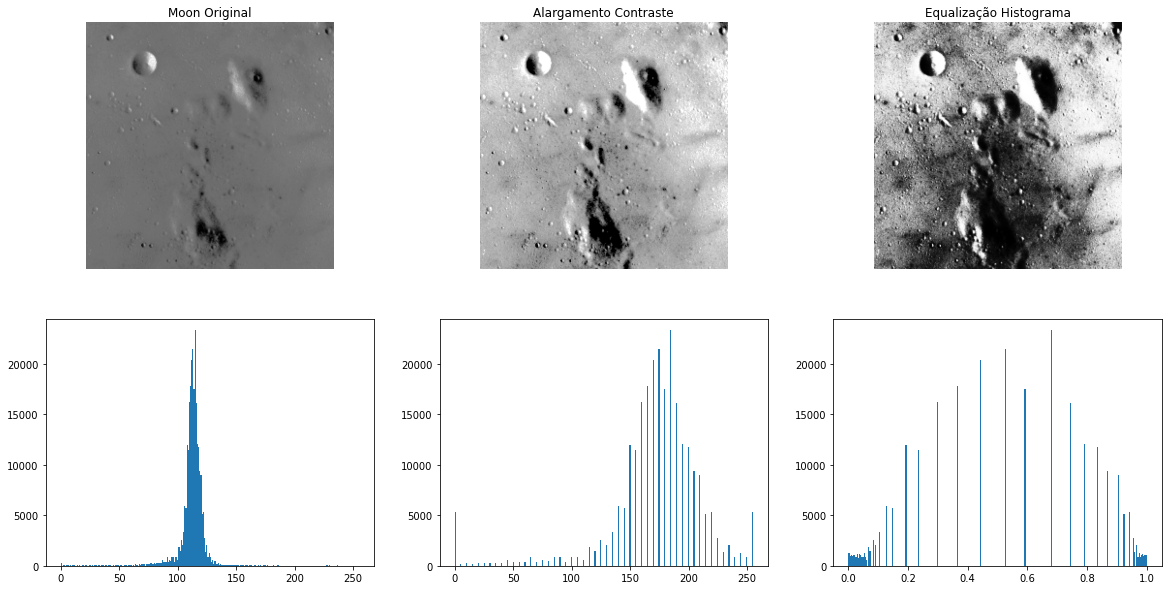

In [ ]:
# Lendo a imagem 'moon', realizando o alargamento de contraste a equalização dos histogramas, e apresentando os histogramas
lua = data.moon()

pinf = np.percentile(lua, 2)
psup = np.percentile(lua, 98)

lua_rescale = exposure.rescale_intensity(lua, in_range=(pinf,psup))
lua_eq = exposure.equalize_hist(lua)

plt.figure(figsize=(20,10))
plt.subplot(2,3,1), plt.imshow(lua, cmap='gray'), plt.axis('off'), plt.title('Moon Original')
plt.subplot(2,3,2), plt.imshow(lua_rescale, cmap='gray'), plt.axis('off'), plt.title('Alargamento Contraste')
plt.subplot(2,3,3), plt.imshow(lua_eq, cmap='gray'), plt.axis('off'), plt.title('Equalização Histograma')
plt.subplot(2,3,4), plt.hist(lua.flatten(), bins = 256)
plt.subplot(2,3,5), plt.hist(lua_rescale.flatten(), bins = 256)
plt.subplot(2,3,6), plt.hist(lua_eq.flatten(), bins = 256)
plt.show()

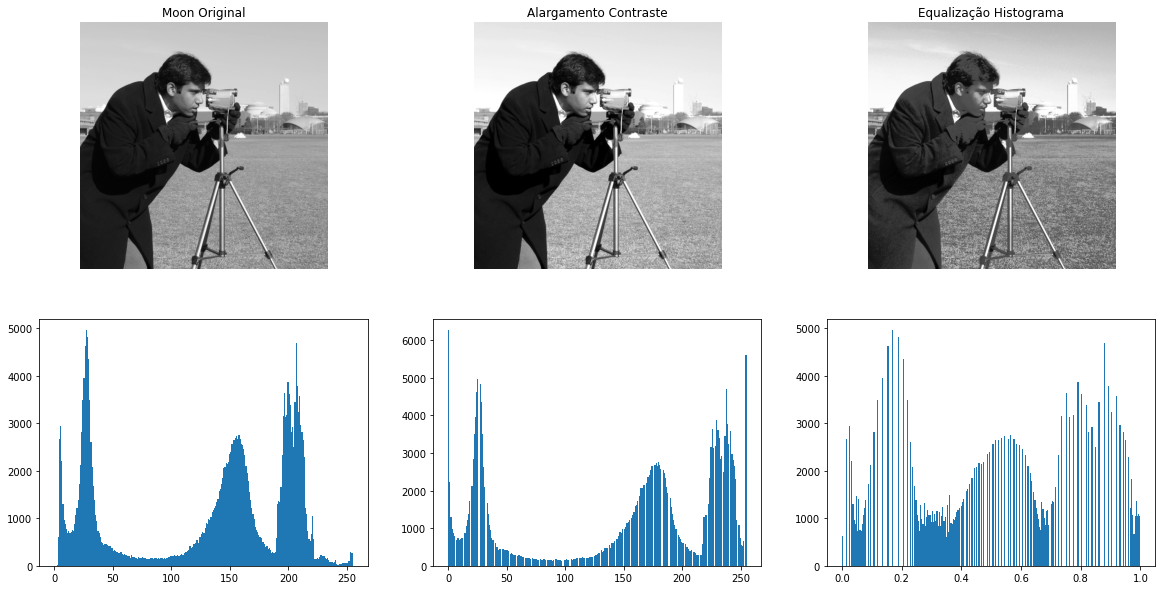

In [ ]:
# Lendo a imagem 'camera', realizando o alargamento de contraste a equalização dos histogramas, e apresentando os histogramas
camera = data.camera()

pinf = np.percentile(camera, 2)
psup = np.percentile(camera, 98)

camera_rescale = exposure.rescale_intensity(camera, in_range=(pinf,psup))
camera_eq = exposure.equalize_hist(camera)

plt.figure(figsize=(20,10))
plt.subplot(2,3,1), plt.imshow(camera, cmap='gray'), plt.axis('off'), plt.title('Moon Original')
plt.subplot(2,3,2), plt.imshow(camera_rescale, cmap='gray'), plt.axis('off'), plt.title('Alargamento Contraste')
plt.subplot(2,3,3), plt.imshow(camera_eq, cmap='gray'), plt.axis('off'), plt.title('Equalização Histograma')
plt.subplot(2,3,4), plt.hist(camera.flatten(), bins = 256)
plt.subplot(2,3,5), plt.hist(camera_rescale.flatten(), bins = 256)
plt.subplot(2,3,6), plt.hist(camera_eq.flatten(), bins = 256)
plt.show()

#**Exercício 5**
0 - Selecione duas imagens coloridas quaisquer (do repositório GitHub ou do seu Google Drive). Para este exercício é interessante que as imagens apresentem gamutes consideravelmente distintos.

1 - Realiza o pareamento de histograma entre as duas imagens: faça com que a primeira imagem tenha um histograma parecido com o da segunda, e vice-versa.

2 - Apresente em uma mesma figura as imagens coloridas originais (primeira linha) e as imagens transformadas (segunda linha).

*Dica: para fazer o pareamento de histogramas, use a função "exposure.match_histograms".*

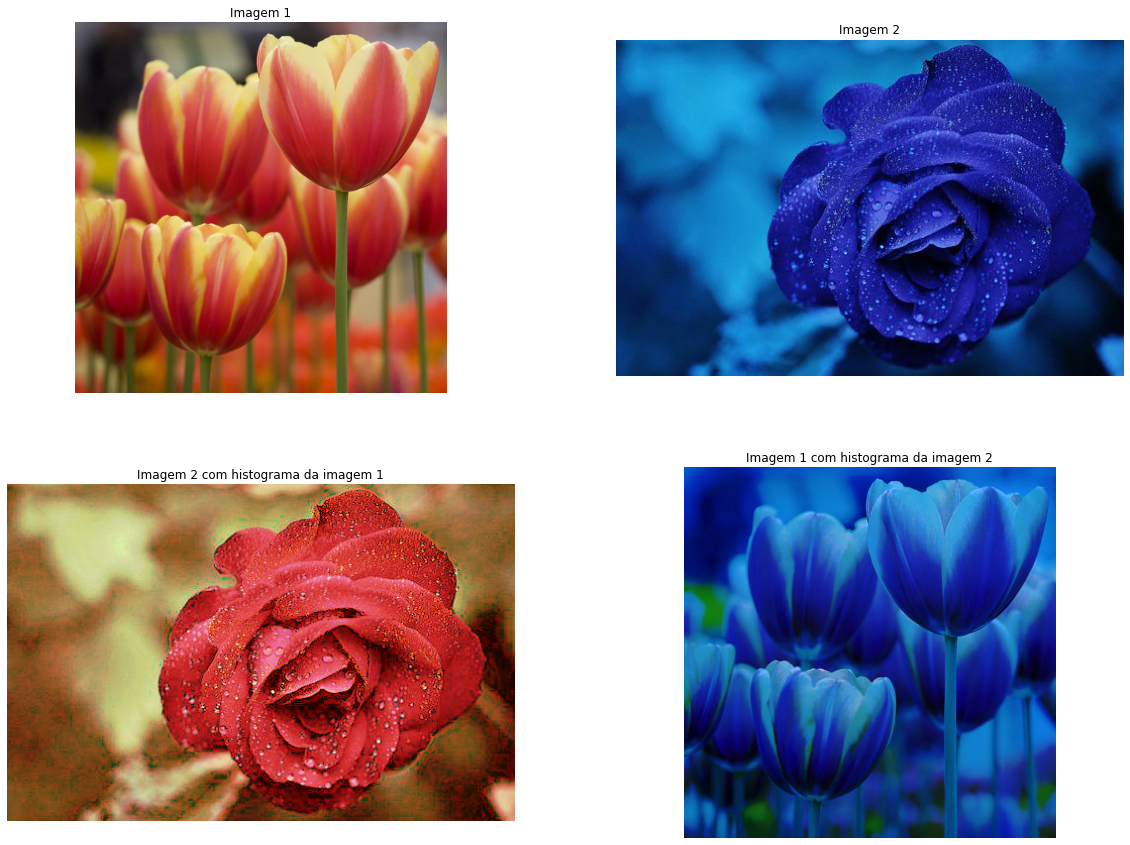

In [ ]:
# Lendo as imagens, pareando histogramas e apresentando as imagens originais e com histogramas pareados
img1 = io.imread('/content/imagens_CG_UERJ/tulipas.jpg')
img2 = io.imread('/content/imagens_CG_UERJ/rosa_azul.jpg')

img1_pareada = exposure.match_histograms(img1,img2,multichannel=True)
img2_pareada = exposure.match_histograms(img2,img1,multichannel=True)

plt.figure(figsize=(20,15))
plt.subplot(2,2,1), plt.imshow(img1), plt.axis('off'), plt.title('Imagem 1')
plt.subplot(2,2,2), plt.imshow(img2), plt.axis('off'), plt.title('Imagem 2')
plt.subplot(2,2,3), plt.imshow(img2_pareada), plt.axis('off'), plt.title('Imagem 2 com histograma da imagem 1')
plt.subplot(2,2,4), plt.imshow(img1_pareada), plt.axis('off'), plt.title('Imagem 1 com histograma da imagem 2')
plt.show()

#**Exercício 6**
0 - Selecione uma imagem monocromática qualquer. Observe que certas imagens monocromáticas, e.g., em formato PNG possuem três canas com intensidades idênticas. Neste caso deve-se extrair um dos canais para realizar o exercicio.

1 - Acrescente à imagem original ruído sal-e-pimenta, e apresente a imagem original e a imagem ruidosa em uma única figura.

2 - A aplique à imagem ruidosa os seguntes filtros: média; gaussiano; e mediana, e apresente numa mesma figura as imagens filtradas.

*Dicas: para introduzir ruído numa imagem, use a função "util.random_noise"; para fazer a filtragem com um filtro de média, use a função "ndimage.convolve"; para fazer a filtragem com um filtro Gaussiano, use a função "filters.gaussian"; para fazer a filtragem com um filtro de mediana, use a função "filters.rank.median".*

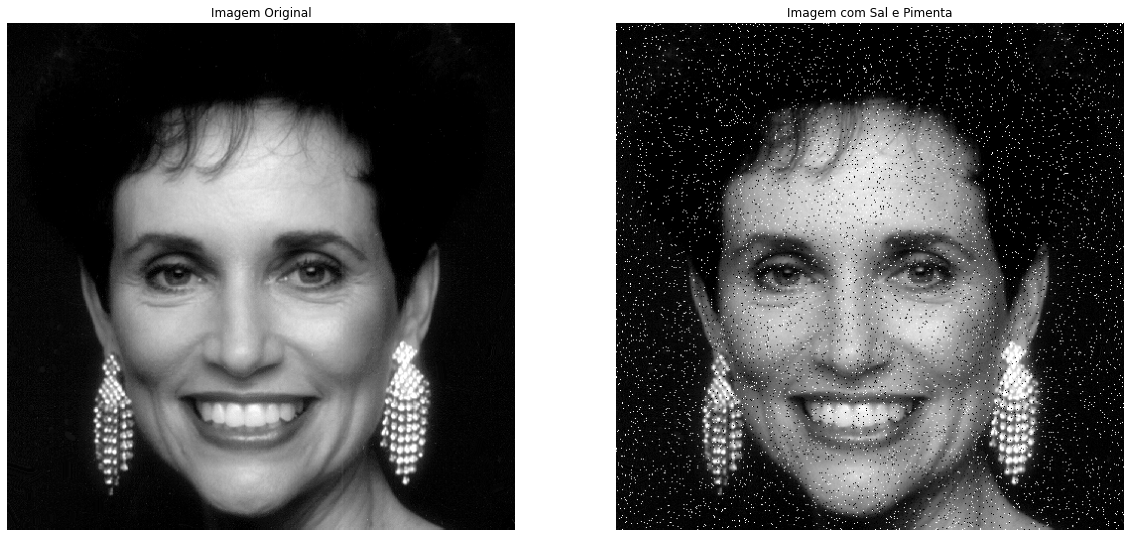

In [ ]:
# Lendo a imagem e acrescentando ruído, e mostrando as duas imagens
img = io.imread('/content/imagens_CG_UERJ/woman.png')

img1 = img[:,:,0]
img_ruido = util.random_noise(img1, mode='s&p')


plt.figure(figsize=(20,10))
plt.subplot(1,2,1), plt.imshow(img1, cmap='gray'), plt.axis('off'), plt.title('Imagem Original')
plt.subplot(1,2,2), plt.imshow(img_ruido, cmap='gray'), plt.axis('off'), plt.title('Imagem com Sal e Pimenta')
plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


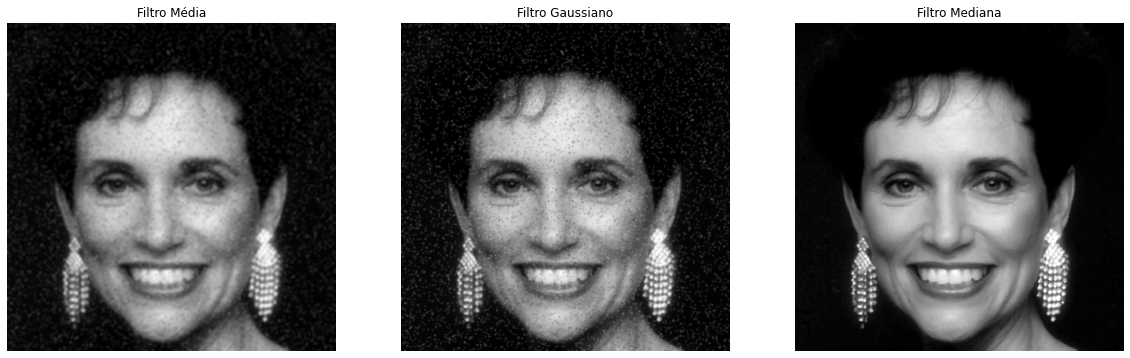

In [ ]:
# Aplicando filtros e mostrando as imagens resultantes
filtro = 1/25*np.ones((5,5))

img_media = ndimage.convolve(img_ruido, filtro)
img_gaus = filters.gaussian(img_ruido)
img_mediana = filters.rank.median(img_ruido, np.ones((3,3)))

plt.figure(figsize=(20,10))
plt.subplot(1,3,1), plt.imshow(img_media, cmap='gray'), plt.axis('off'), plt.title('Filtro Média')
plt.subplot(1,3,2), plt.imshow(img_gaus, cmap='gray'), plt.axis('off'), plt.title('Filtro Gaussiano')
plt.subplot(1,3,3), plt.imshow(img_mediana, cmap='gray'), plt.axis('off'), plt.title('Filtro Mediana')
plt.show()

#**Exercício 7**
0 - Selecione uma imagem colorida qualquer e transforme-a em uma imagem monocromática.

1 - Calcule a magnitude e o ângulo do gradiente da imagem monocromática utilizando os filtros de Sobel vertical e horizontal.

3 - Apresente numa mesma figura a imagem original (colorida), a imagem monocromática, a imagem da amplitude do gradiente, e a imagem do ângulo do gradiente.

*Dicas: para fazer a filtragem com um filtro de derivação, use a função "ndimage.convolve"; para calcular amplitudes e ângulos do gradiente, use as funções "np.sqrt", "np.square", e "np.arctan2".*

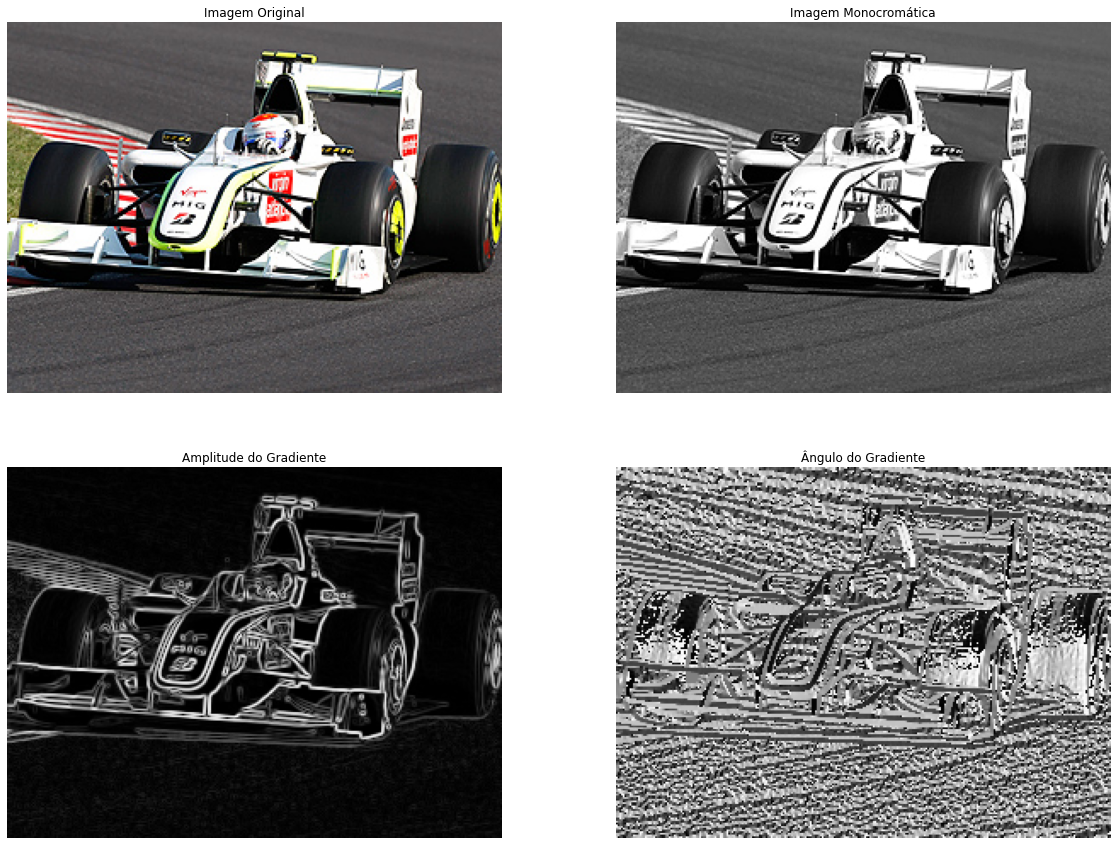

In [ ]:
# Lendo a imagem e transformando em monocromática, calculando gradiente e apresentando as imagens: original; monocromática; amplitude do gradiente; ângulo do gradiente
img = io.imread('/content/imagens_CG_UERJ/brawn.bmp')
img_gray = color.rgb2gray(img)

Gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
Gy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

sobel_x = ndimage.convolve(img_gray, Gx)
sobel_y = ndimage.convolve(img_gray, Gy)

amplitude = np.sqrt(np.square(sobel_y) + np.square(sobel_x))
angulo = np.arctan2(sobel_y, sobel_x)

plt.figure(figsize=(20,15))
plt.subplot(2,2,1), plt.imshow(img), plt.axis('off'), plt.title('Imagem Original')
plt.subplot(2,2,2), plt.imshow(img_gray, cmap='gray'), plt.axis('off'), plt.title('Imagem Monocromática')
plt.subplot(2,2,3), plt.imshow(amplitude, cmap='gray'), plt.axis('off'), plt.title('Amplitude do Gradiente')
plt.subplot(2,2,4), plt.imshow(angulo, cmap='gray'), plt.axis('off'), plt.title('Ângulo do Gradiente')
plt.show()